# 1. K-NN classifier

**Question** How does the k-NN algorithm work?

**Question** What are the parameters we need to choose to classify with k-NN? How can we choose them

**Question** What are the advantages and disadvantages of this algorithm? For which kind of dataset it would be appropriate and for which datasets it wouldn't?

**Question** How can we deal with nominal values in distance measurement?


In further part of the laboratory, we will perform a preprocessing of the data and a classification of a set of biomedical voice measurements. Some of them has been recorded for people with Parkinson's desease.

More about the dataset: https://archive.ics.uci.edu/ml/datasets/parkinsons

First, we load the required packages:

In [117]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

# 2. Data loading and analysis of the attributes
Let's start with the data preparation, 
#### 2.1. Load the dataset from file parkinsons.csv into data frame using library pandas (pd.read_csv). Write the body of the read_data function to return a data frame with attributes and a list with class labels. Classes are available in 'status' column. You should also remove column 'name' from the data (see function drop of dataFrame https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [118]:
def read_data(path):
    df = pd.read_csv(path)
    # Preprocess the data
    # Remove the 'name' column
    df.drop(columns=['name'], inplace=True)
    # extract status column as series
    y = df['status']
    # Drop the status column from the dataframe
    df.drop(columns=['status'], inplace=True)

    return (df, y)

data_X, data_Y = read_data("parkinsons.data")

Let's see what we have loaded.

In [119]:
data_X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [120]:
data_Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

#### 1.2. Let's analyse the given data. 
* How many attributes are in given data?
* Are the attributes on the common scale?
* Are observations equally distributed for sick and healthy people?

Plot the histogram of the assigned class and analyse the distribution.


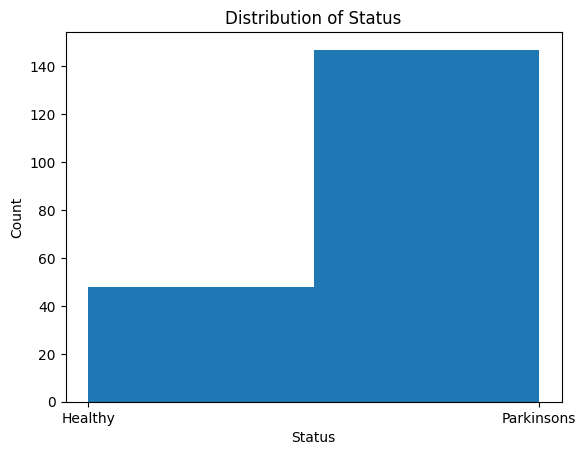

In [121]:
#TODO
# plt.hist(...)
plt.hist(data_Y, bins=2)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status')
plt.xticks([0, 1], ['Healthy', 'Parkinsons'])
plt.show()

Plot the histograms of the first 5 attributes. 

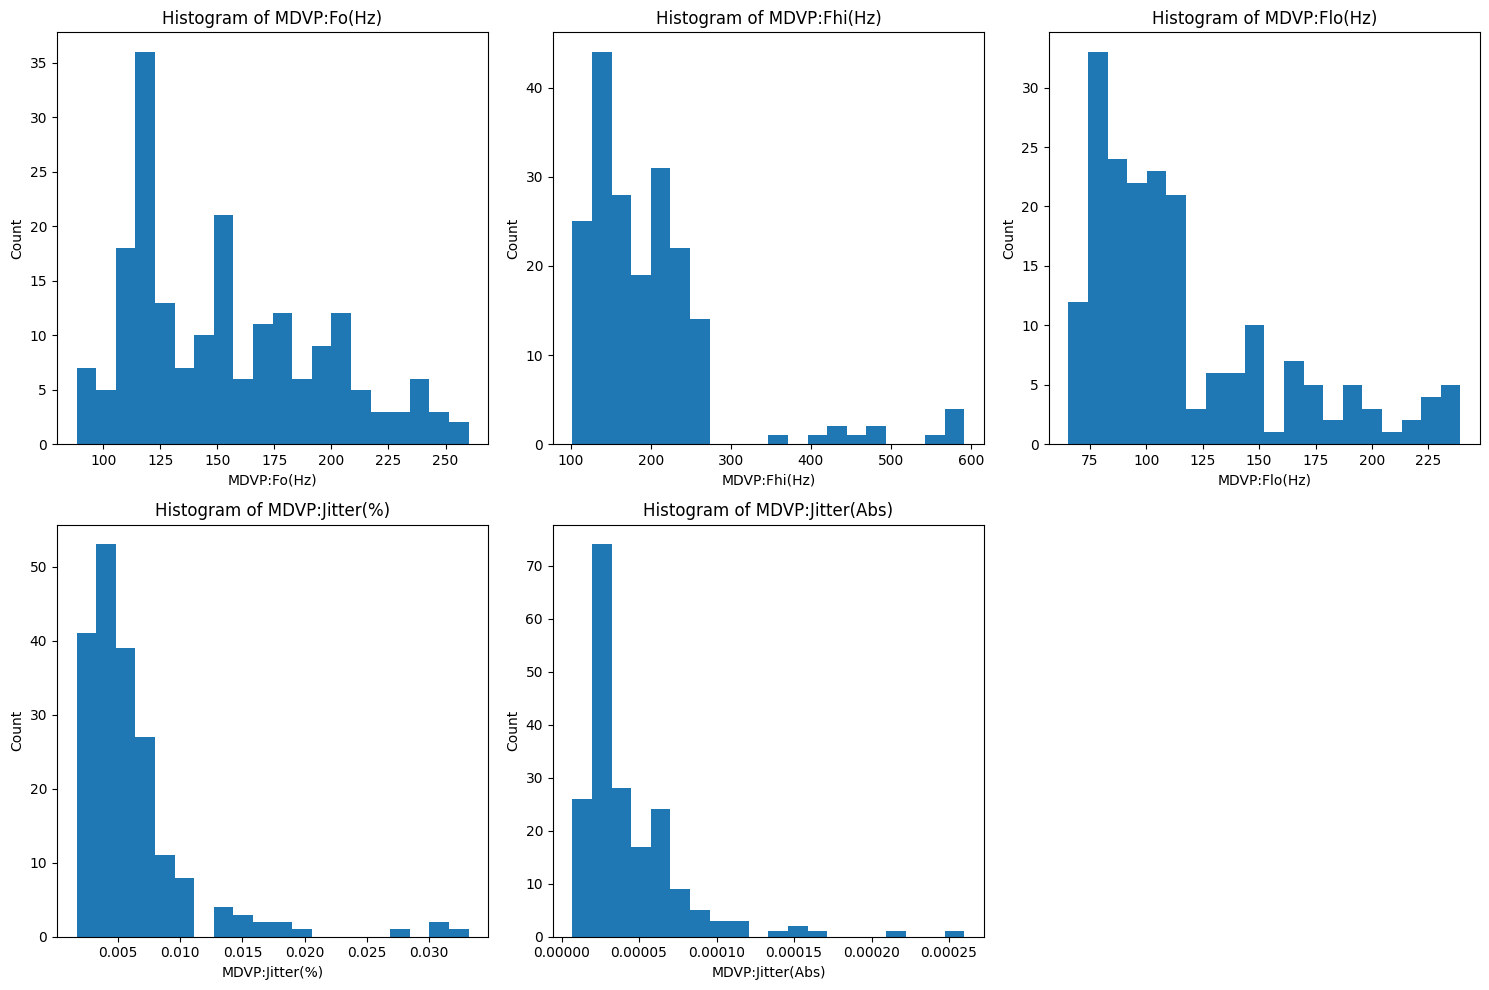

In [122]:
#TODO
# Plot the histograms of the first 5 attributes. 
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.hist(data_X.iloc[:, i], bins=20)
    plt.xlabel(data_X.columns[i])
    plt.ylabel('Count')
    plt.title(f'Histogram of {data_X.columns[i]}')
plt.tight_layout()
plt.show()


# 3. Train and test set selection

#### We want to build our classifier and test it on another set of observations.

To split data into train and test sets use train_test_split method from sklearn.model_selection module (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Use 80% of cases in train set and 20% in test set. 
Use random_state = 5 just to be sure we all have the same rows in train and test sets :)

split_data should return a tuple containing: dataframe with train set attributes, list of labels for train data, dataframe with test set attributes and a list of labels for test data.

In [123]:
def split_data(data_X, data_Y, test_percent):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=test_percent)
    
    return (X_train, y_train, X_test, y_test)
    
(train_X, train_Y, test_X, test_Y) = split_data(data_X, data_Y, 0.3)
print("rows in train set: ", train_X.shape[0])
print("rows in test set:", test_X.shape[0])

rows in train set:  136
rows in test set: 59


# 4. Data standarization/normalization
#### 4.1. Use k-NN algorithm to classify the obtained test set using k=3. What is the accuracy of the classification?

Use KNeighborsClassifier class from sklearn.neighbors module. Useful methods: fit and predict. Classification accuracy can be obtained with accuracy_score method from sklearn.metrics. Function get_classification_accuracy should return the accuracy of classification of given test set on model build with train set.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [124]:
def get_classification_accuracy(train_data_X, train_data_Y, test_data_X, test_data_Y, k = 3):
    # KNeighbors Classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the model
    knn.fit(train_data_X, train_data_Y)
    # Make predictions
    predictions = knn.predict(test_data_X)
    # Calculate accuracy
    accuracy = metrics.accuracy_score(test_data_Y, predictions)

    return accuracy

get_classification_accuracy(train_X, train_Y, test_X, test_Y)

0.7966101694915254

#### 4.2. Perform some normalization or standarization of attributes. Then repeat the classification. Do the classification accuracy change?

You can use sklearn.preprocessing.StandardScaler, sklearn.preprocessing.MinMaxScaler or sklearn.preprocessing.MaxAbsScaler and their fit_transform/transform methods.

Try other standarization methods to verify the standarization procedure influence the classification accuracy.
standarize_train_and_test should return 2 dataFrames - with normalized train and normalized test sets.

In [125]:
def standarize_train_and_test(train_X, test_X):
    # Standardize the data
    scaler = preprocessing.StandardScaler()
    # Fit the scaler on the training data
    scaler.fit(train_X)
    # Transform the training data
    train_X = scaler.transform(train_X)
    # Transform the test data
    test_X = scaler.transform(test_X)
    
    return train_X, test_X

norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X)
get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y)

0.864406779661017

# 5. Choosing k value
Using train set with normalization/standarization obtained in the previous exercices run k-NN algoritm using k from 1 to 20. Use 5-fold cross-validation within the train set to obtain the classification accuracy. Plot the obtained accuracy of the classification. Which k value seems to be the best for the given dataset?

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html for more info about cross validation in sklearn.

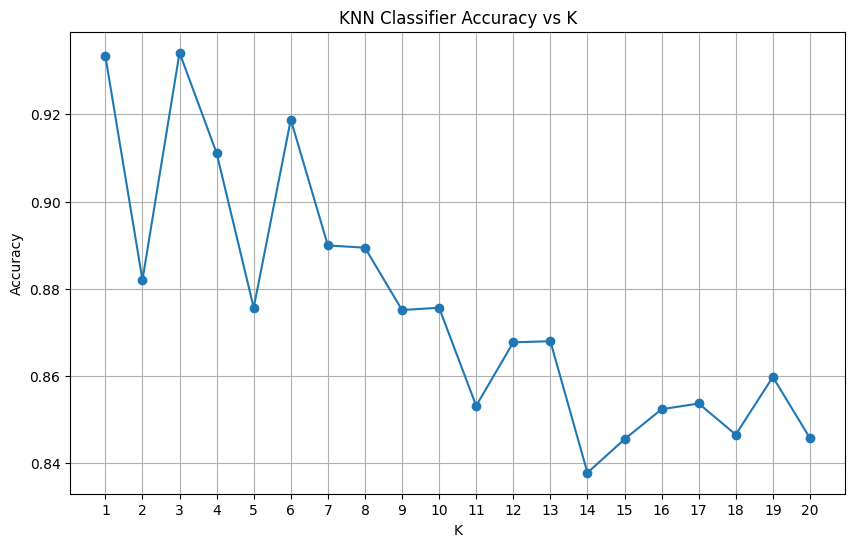

In [126]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)
cross_val_results = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, norm_train_X, train_Y, cv=kf)
    cross_val_results.append((k, scores['test_score'].mean()))


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in cross_val_results], [x[1] for x in cross_val_results], marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy vs K')
plt.xticks(range(1, 21))
plt.grid()
plt.show()

# 6. Testing classifier
Train the k-NN classifier again and test it using the obtained best k value on a test set to check the final classification accuracy. You can just call the previous written function get_classification_accuracy)

In [129]:
get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y, 3)


0.864406779661017

# 7. Homework
Finish all the above tasks in this notebook that you have not finished during class.

You are given a dataset containing information about 1600 red wines (winequality.csv) containing 11 attributes and assignment to one of the three wine quality classess: "poor", "medium" and "good". Perform a preprocessing of this dataset (normalization, standardization). Divide this set into the train and test sets. Choose experimentally the best value of k (using cross-validation) and perform classification using the  k-nn algoritm with the chosen k value.

Write a short **report** (may be in this notebook as a separate section below) containing information about the used preprocessing methods, chosen train/test split method (percentage of examples in train/test sets, if shuffling or stratification was used), plot of the accuracy depending of k parameter, finally chosen k and obtained classification accuracy on a test set.   
    